# Project: Investigate a Dataset (TMDb movie data Analysis!)

> ## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I have selected the <b>TMdb movies dataset</b>. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The dataset is saved in a file called "tmdb-movies.csv" uploaded along with this jupyter notebook.

In [68]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#Organize imports
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [69]:
# Import the dataset
# moviesRaw = pd.read_csv("tmdb-movies.csv")
# Have a peek at the dataset
# moviesRaw.head()
# Wouldnt it be better to have id as the index?
moviesRaw  = pd.read_csv("tmdb-movies.csv", index_col="id")
moviesRaw.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> As we can see the dataset contains a lot of info such as popularity, revenue, cast, director, runtime, genre etc.


> ### <font color = 'blue'>Questions I would like to answer after seeing the dataset?</font>
    1. What is vote_average year to year? Are movies getting better/ worse?
    2. Which genres are most popular from year to year?
    3. Which genres are the most popular/ highest grossing(revenue)/ High budget genres/ Receive high vote_average?
    4. Is there a specific time when majority of the movies are released?
    5. Actors that have the maximum movies ?
    6. Production Houses that have the maximum movies vs Production Houses that drive the most revenue.

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [70]:
# Info about the data?
moviesRaw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj       

> The dataset consists of 10866 enteries. The Imdb_id has 10 missing enteries. We can ignore this column as we won't be doing any analysis over this id since its completely random and has no correlation with any of the other columns.
The genre column also has a few missing enteries and is multi valued. We will ungroup the generes and will also have to do something about the missing enteries when we answer our question : Which genres are most popular from year to year?

The release_date column has an object datatype. We will convert this into a datetime series.

### Data Cleaning 

> Lets start by removing some of the columns that we won't need and making our dataset thinner.
Remove the imbd_id, original_title, tagline, keywords, overview, budget_adj, revenue_adj

In [71]:
# We Should not drop columns like this before finding correlations with other columns. 
moviesRaw.drop(["imdb_id","original_title","tagline","keywords","overview"],axis=1,inplace=True)
moviesRaw.head()
# A peek at our more compact data set.

,popularity,budget,revenue,cast,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> Lets convert the release_year into a datetime series

In [72]:
def convertDateTime(row):
    releaseDate = row["release_date"]
    last = releaseDate.rfind('/')
    monthDay = releaseDate[:(last+1)]
    year = row["release_year"]
    date = monthDay + str(year)
    return date

moviesRaw["release_date"] = moviesRaw.apply(convertDateTime, axis=1)
moviesRaw["release_date"] = pd.to_datetime(moviesRaw["release_date"], format="%m/%d/%Y")

In [73]:
moviesRaw.head()

,popularity,budget,revenue,cast,homepage,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


> Lets create separate dataframes where we have multi valued columns 

<b>1. Split the generes into individual values.</b>

In [74]:
columns = ["popularity", "budget", "revenue", "budget_adj","revenue_adj", "vote_count", "vote_average", "release_year", "release_date"]
generesDf = moviesRaw.genres.str.split('|').apply(pd.Series)
generesDf.index = moviesRaw.set_index(columns).index
generesDf = generesDf.stack().reset_index(columns)
#Rename the new column
generesDf=generesDf.rename(columns = {0:'genre'})
generesDf.head()

,popularity,budget,revenue,budget_adj,revenue_adj,vote_count,vote_average,release_year,release_date,genre
0,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,5562,6.5,2015,2015-06-09,Action
1,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,5562,6.5,2015,2015-06-09,Adventure
2,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,5562,6.5,2015,2015-06-09,Science Fiction
3,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,5562,6.5,2015,2015-06-09,Thriller
0,28.419936,150000000,378436354,1.379999e+08,3.481613e+08,6185,7.1,2015,2015-05-13,Action


<b>2. Split the cast into individual values</b> 

In [75]:
castDf = moviesRaw.cast.str.split('|').apply(pd.Series)
castDf.index = moviesRaw.set_index(columns).index
castDf = castDf.stack().reset_index(columns)
#Rename the new column
castDf=castDf.rename(columns = {0:'cast'})
castDf.head()

,popularity,budget,revenue,budget_adj,revenue_adj,vote_count,vote_average,release_year,release_date,cast
0,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,5562,6.5,2015,2015-06-09,Chris Pratt
1,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,5562,6.5,2015,2015-06-09,Bryce Dallas Howard
2,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,5562,6.5,2015,2015-06-09,Irrfan Khan
3,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,5562,6.5,2015,2015-06-09,Vincent D'Onofrio
4,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,5562,6.5,2015,2015-06-09,Nick Robinson


<b>3. Split the production houses into individual values</b> 

In [76]:
productionDf = moviesRaw.production_companies.str.split('|').apply(pd.Series)
productionDf.index = moviesRaw.set_index(columns).index
productionDf = productionDf.stack().reset_index(columns)
#Rename the new column
productionDf=productionDf.rename(columns = {0:'production_companies'})
productionDf.head()

,popularity,budget,revenue,budget_adj,revenue_adj,vote_count,vote_average,release_year,release_date,production_companies
0,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,5562,6.5,2015,2015-06-09,Universal Studios
1,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,5562,6.5,2015,2015-06-09,Amblin Entertainment
2,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,5562,6.5,2015,2015-06-09,Legendary Pictures
3,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,5562,6.5,2015,2015-06-09,Fuji Television Network
4,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,5562,6.5,2015,2015-06-09,Dentsu


<a id='eda'></a>
## Exploratory Data Analysis

<hr>



#### Lets first look if any variables have correlation with each other.

In [77]:
corr = moviesRaw.corr()
corr

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


Text(0.5,1,'Heatmap depicting correlation b/w features')

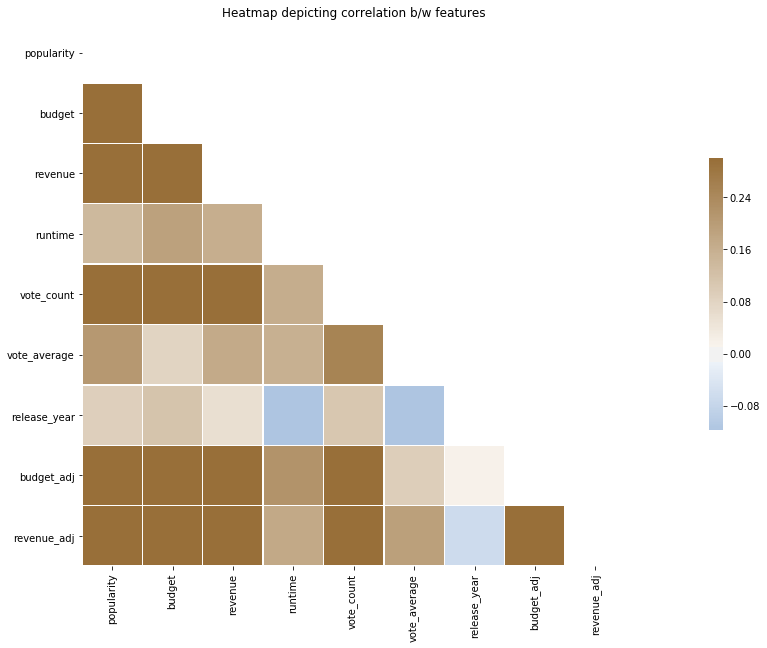

In [78]:
# Lets Also Draw a heatmap

# HeatMap :
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 50, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Heatmap depicting correlation b/w features")

> We can see from the correlation matrix that budget, revenue & popularity are all positively correlated.
   Also vote_count seems to be positively correlated to the above three properties which should be expected : 
    More popular the movie, more the people who vote for it.

### Research Question 1 ( What is vote_average year to year? Are movies getting better/ worse?)

### <font color = 'blue'>vote_average</font> statistics
> Lets find out what is the average rating movies get.

In [79]:
# Measures of central tendency
# Mean vote_average
print("Mean Vote Average ", np.mean(moviesRaw["vote_average"]))
print("Median Vote Average ", np.median(moviesRaw["vote_average"]))

# Measures of variabilty
print("Standard Deviation ", np.std(moviesRaw["vote_average"]))


Mean Vote Average  5.974921774342001
Median Vote Average  6.0
Standard Deviation  0.9350987836993223


Text(0.5,1,'Vote Average Distribution. Most movies get an average vote of 6')

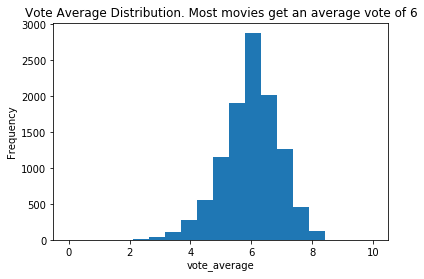

In [80]:
# Visualize? Mode is better to tell from a histogram

bins = np.linspace(0, 10, 20)
moviesRaw["vote_average"].plot(kind = 'hist', bins = bins )
plt.xlabel("vote_average")
plt.title("Vote Average Distribution. Most movies get an average vote of 6")

> Looks like most of the vote_average falls around 6.

Text(0.5,1,'Vote Average Over the years')

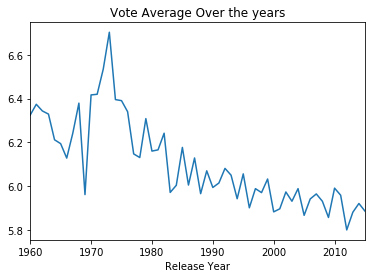

In [81]:
# Vote Average over the years ?
moviesRaw.groupby("release_year")["vote_average"].mean().plot()
plt.xlabel("Release Year")
plt.title("Vote Average Over the years")

> Looking at the graph, we can see that vote_average has fallen through the years! Is it because movies are getting worse? Well vote_average doesn't seem to have a clear negative correlation with any other variable. Maybe movies are getting worse maybe not. Maybe it has something to do with vote count?

Text(0.5,1,'Vote Count over the years')

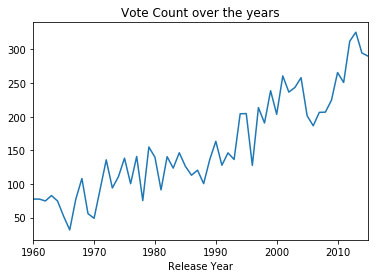

In [82]:
# Lets study vote_count over the years!

moviesRaw.groupby("release_year")["vote_count"].mean().plot()
plt.xlabel("Release Year")
plt.title("Vote Count over the years")

> The vote count has increased over the years. Maybe that is a reason. More the people who vote, more scrutiny? Again just a hypotheses.

### Research Question 2 (Which genres are most popular from year to year?)

In [83]:
# We will use our genres dataframe for this question.

def modeString(list):
    """This function will find the most frequently occuring string in the given list of string."""
    npArr = np.array(list)
    item, mode = stats.mode(npArr)
    return item

genresByYear = generesDf.groupby(['release_year'])['genre'].agg(modeString)
genresByYear.head(56)

/Users/ishans/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


release_year
1960     Drama
1961     Drama
1962     Drama
1963    Comedy
1964     Drama
1965     Drama
1966    Comedy
1967    Comedy
1968     Drama
1969     Drama
1970     Drama
1971     Drama
1972     Drama
1973     Drama
1974     Drama
1975     Drama
1976     Drama
1977     Drama
1978     Drama
1979     Drama
1980     Drama
1981     Drama
1982     Drama
1983     Drama
1984     Drama
1985    Comedy
1986     Drama
1987    Comedy
1988    Comedy
1989    Comedy
1990     Drama
1991     Drama
1992     Drama
1993     Drama
1994    Comedy
1995     Drama
1996     Drama
1997     Drama
1998     Drama
1999     Drama
2000     Drama
2001    Comedy
2002     Drama
2003    Comedy
2004     Drama
2005     Drama
2006     Drama
2007     Drama
2008     Drama
2009     Drama
2010     Drama
2011     Drama
2012     Drama
2013     Drama
2014     Drama
2015     Drama
Name: genre, dtype: object

Text(0.5,1,'Most popular genre over the years')

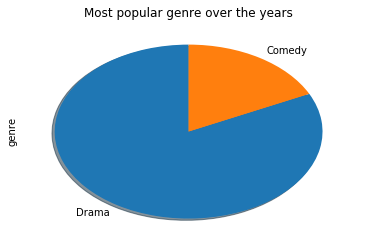

In [84]:
genresByYear.value_counts().plot(kind="pie", shadow = True, startangle = 90)
plt.title("Most popular genre over the years")

> "Drama" seems to be the most popular genre year after year with comedy sometimes tipping it off from its first position.

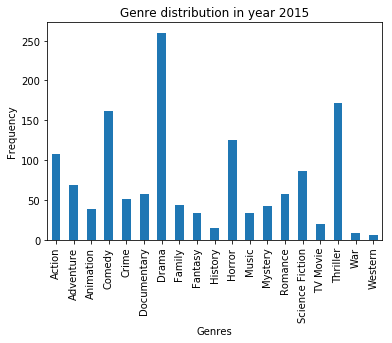

In [85]:
# Example Genre visualization for year 2015

genresYear2015 = generesDf[generesDf["release_year"] == 2015].groupby("genre")["vote_count"].count()
genresYear2015.plot(kind="bar")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.title("Genre distribution in year 2015")
plt.show()

<hr>

### Research Question 3  (Highest grossing genres? / Most popular genres?/ Most Expensive genres?)

####  - Highest grossing genres 

In [86]:
# For finding the highest grossing genre, group the data by genre and find the avg of the revnue.

revenueByGeneres = generesDf.groupby("genre")["revenue_adj"].mean()
revenueByGeneres.sort_values()

genre
TV Movie           3.496353e+05
Foreign            1.784286e+06
Documentary        2.258210e+06
Horror             2.408271e+07
Drama              4.040885e+07
Western            4.610126e+07
Music              4.665592e+07
Comedy             4.789700e+07
History            4.794858e+07
Romance            4.820022e+07
Mystery            5.088930e+07
Thriller           5.526742e+07
Crime              5.659533e+07
War                6.998611e+07
Animation          8.525613e+07
Science Fiction    8.690849e+07
Family             8.773671e+07
Action             9.172020e+07
Fantasy            1.112342e+08
Adventure          1.416752e+08
Name: revenue_adj, dtype: float64

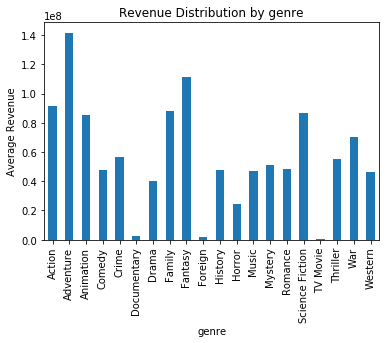

In [87]:
# Plot a bar chart of the genre vs avg revnue.
revenueByGeneres.plot(kind="bar")
plt.ylabel("Average Revenue")
plt.title("Revenue Distribution by genre")
plt.show()

> Even though "Drama" is the most made genre, "Adventure" seems to be the highest grossing genre(on average!), followed by "Fantasy"..

#### - Most popular genres

6.5e-05 32.985763


Text(0.5,1,'Popularity distribution by genre')

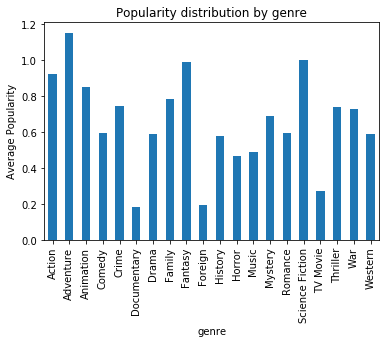

In [88]:
# Lets now find out the most popular genre. To to do this, we will group our dataset by genre and find the avg popularity.

popScaleMin = moviesRaw["popularity"].min()
popSacleMax = moviesRaw["popularity"].max()
print(popScaleMin, popSacleMax)

generesDf.groupby("genre")["popularity"].mean().plot(kind = 'bar')
plt.ylabel("Average Popularity")
plt.title("Popularity distribution by genre")

> We should have expected this. The graph looks pretty similar to the revenue graph. Popularity and revenue should be positively correlated. The more popular a movie is, the more revenue we can expect. Adventure movies have more popularity and consequently have higher revenue. 

#### - Most Expensive genres

Text(0.5,1,'Budget distribution by genre')

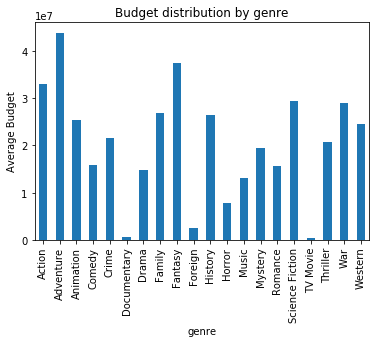

In [89]:
# Average budget per genre?
# To answer this question, we will group our data by genre and find the avg budget.

generesDf.groupby("genre")["budget_adj"].mean().plot(kind = 'bar')
plt.ylabel("Average Budget")
plt.title("Budget distribution by genre")

> Not suprisingly, Popular and high grossing movies require more budget & vice versa (More the budget, more the marketing, and conseqently more the popularity and revenue):>
This is also clear from the correlation matrix.

In [90]:
# Do certain Genres get high vote average ?

generesDf.groupby("genre")["vote_average"].mean()

genre
Action             5.787421
Adventure          5.940585
Animation          6.403147
Comedy             5.905167
Crime              6.124059
Documentary        6.908462
Drama              6.165301
Family             5.997563
Fantasy            5.863537
Foreign            5.981383
History            6.410479
Horror             5.337447
Music              6.480392
Mystery            5.946790
Romance            6.042874
Science Fiction    5.665041
TV Movie           5.788024
Thriller           5.750413
War                6.297778
Western            6.083030
Name: vote_average, dtype: float64

> Looks like genres doesnt affect the vote_average (Which should be expected ;>)

<hr>

### Research Question 4  (Is there a specific time when majority of the movies are released?)

Text(0.5,1,'Feature distribution by month of the movie released')

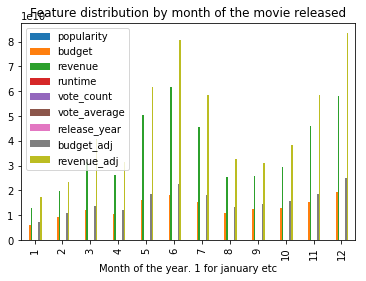

In [91]:
# Lets find if there is a specific month
moviesRaw["monthReleased"] = moviesRaw["release_date"].dt.month
moviesRaw.groupby("monthReleased").sum().plot(kind = 'bar')
plt.xlabel("Month of the year. 1 for january etc")
plt.title("Feature distribution by month of the movie released")

> This finding is in conjuction with what is called <b>DUMP MONTHS</b>. See https://en.wikipedia.org/wiki/Dump_months.
Movies that have high budget/revenue are not released in jan/fed & Aug/Sept since these months are expected to have fewer viewers.

### Research Question 5 ( Actors that have the maximum movies ?)

Text(0.5,1,'Movie distribution by Actor')

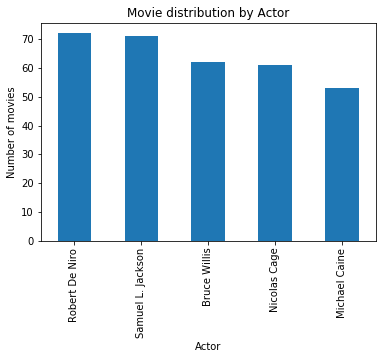

In [92]:
# To do this, we will work with the cast dataframe t
castDf.groupby("cast")["release_year"].count().sort_values(ascending =False).head(5).plot(kind = 'bar')
plt.ylabel("Number of movies")
plt.xlabel("Actor")
plt.title("Movie distribution by Actor")

> Robert De Niro and Samuel L Jackson have the maximum movies!

### Research Question 6 ( Production Houses that have the maximum movies vs Production Houses that drive the most revenue.)

Text(0.5,1,'Distribution of movies by Production Houses')

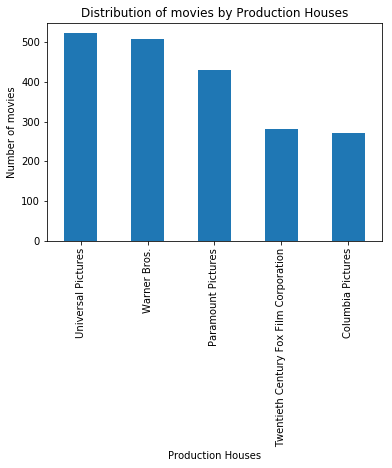

In [93]:
# Production Houses that have the maximum movies!
# For this question, we will use the production houses dataframe!

productionDf.groupby("production_companies")["release_year"].count().sort_values(ascending = False).head().plot(kind = 'bar')
plt.xlabel("Production Houses")
plt.ylabel("Number of movies")
plt.title("Distribution of movies by Production Houses")

Text(0.5,1,'Total revenue distrubution by production houses')

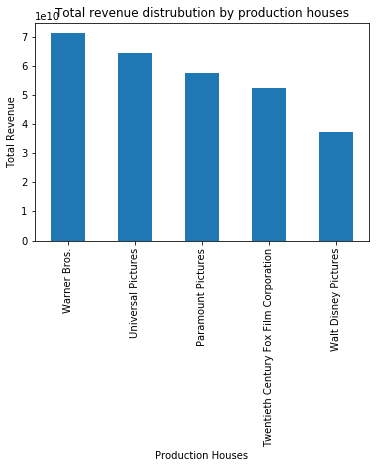

In [94]:
# Production Houses that drive the most revenue

productionDf.groupby("production_companies")["revenue_adj"].sum().sort_values(ascending = False).head().plot(kind = 'bar')
plt.xlabel("Production Houses")
plt.ylabel("Total Revenue")
plt.title("Total revenue distrubution by production houses")

> Even though Universal Pictures has the maximum number of movies, Warner Bros has the highest revenue generated!

<hr>

<a id='conclusions'></a>
## Conclusions

    DataSet limitations : The data set only had 10k enteries for the past 50+ years. Even if drama is the most common genre in this sample, we can't really be sure if drama is indeed the most genre every year.    
    
    We couldnt conclude whether vore_average going down over the years was because the movies were getting worse or beacuse more people vote for newer movies (and hence more scrutiny). Eg we want to build a vote_average prediction system. We cant really use the date field since we are not really sure if that affects it in any way possible.
    
    
    A Brief summary of what we found out:
    
    - Vote Average has gone down over the years.
    - Drama is the most common genre year to year.
    - More the budget, more likely the movie is to be popular and hence likely to get more revenue.
    - Adventure is the most expensive genre. Also, it is the most popular & highest grossing (Because of the above correlation).
    - Movies that have high budget/revenue are not released in jan/fed & Aug/Sept (or Dump months).
    - Robert De Niro and Samuel L Jackson have the maximum movies
    - Even though Universal Pictures has the maximum number of movies, Warner Bros has the highest revenue generated!